In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from functions import *

In [27]:
# opened_file = open('Dstillery_dataset.txt')
# from csv import reader
# read_file = reader(opened_file)
# apps_data = list(read_file)

# with open('Dstillery_dataset.txt','r') as f:
#     shakespeare = f.read().split('\n')


## Load Dataset

In [3]:
df = pd.read_csv('Dstillery_dataset.txt',sep='\t')

In [4]:
df.reset_index(drop=True, inplace = True)

In [5]:
df.head()

,isbuyer,buy_freq,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
0,0,NaN,1,0.0,0.0,0.0,0.0000,106,106,0,0,169,2130,0
1,0,NaN,1,0.0,0.0,0.0,0.0000,72,72,0,0,154,1100,0
2,0,NaN,1,0.0,0.0,0.0,0.0000,5,5,0,0,4,12,0
3,0,NaN,1,0.0,0.0,0.0,0.0000,6,6,0,0,150,539,0
4,0,NaN,2,0.0,0.5,0.0,-101.1493,101,101,0,1,103,362,0


## Exploring the dataset

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54584 entries, 0 to 54583
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   isbuyer              54584 non-null  int64  
 1   buy_freq             2327 non-null   float64
 2   visit_freq           54584 non-null  int64  
 3   buy_interval         54584 non-null  float64
 4   sv_interval          54584 non-null  float64
 5   expected_time_buy    54584 non-null  float64
 6   expected_time_visit  54584 non-null  float64
 7   last_buy             54584 non-null  int64  
 8   last_visit           54584 non-null  int64  
 9   multiple_buy         54584 non-null  int64  
 10  multiple_visit       54584 non-null  int64  
 11  uniq_urls            54584 non-null  int64  
 12  num_checkins         54584 non-null  int64  
 13  y_buy                54584 non-null  int64  
dtypes: float64(5), int64(9)
memory usage: 5.8 MB


In [7]:
df.describe()

,isbuyer,buy_freq,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
count,54584.000000,2327.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000,54584.000000
mean,0.042632,1.240653,1.852777,0.210008,5.825610,-0.198040,-10.210786,64.729335,64.729335,0.006357,0.277444,86.569343,720.657592,0.004635
std,0.202027,0.782228,2.921820,3.922016,17.595442,4.997792,31.879722,53.476658,53.476658,0.079479,0.447742,61.969765,1275.727306,0.067924
min,0.000000,1.000000,0.000000,0.000000,0.000000,-181.923800,-187.615600,0.000000,0.000000,0.000000,0.000000,-1.000000,1.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,18.000000,18.000000,0.000000,0.000000,30.000000,127.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,51.000000,51.000000,0.000000,0.000000,75.000000,319.000000,0.000000
75%,0.000000,1.000000,2.000000,0.000000,0.104167,0.000000,0.000000,105.000000,105.000000,0.000000,1.000000,155.000000,802.000000,0.000000
max,1.000000,15.000000,84.000000,174.625000,184.916700,84.285710,91.401920,188.000000,188.000000,1.000000,1.000000,206.000000,37091.000000,1.000000


In [8]:
# deploy a function that return value_counts for all the attributes
value__counts(df)

0    52257
1     2327
Name: isbuyer, dtype: int64
1.0     1980
2.0      244
3.0       55
4.0       20
5.0       17
6.0        5
7.0        2
11.0       2
15.0       1
8.0        1
Name: buy_freq, dtype: int64
1     39358
2      7697
3      2879
4      1358
5       810
      ...  
65        1
50        1
43        1
84        1
60        1
Name: visit_freq, Length: 64, dtype: int64
0.000000      54237
0.041667         17
0.083333          3
0.125000          3
3.041667          3
              ...  
170.833300        1
7.583333          1
31.583330         1
20.638890         1
9.958333          1
Name: buy_interval, Length: 295, dtype: int64
0.000000      39440
0.041667       1319
0.083333        145
0.125000        107
1.000000         67
              ...  
1.627451          1
92.750000         1
3.937500          1
140.000000        1
12.822920         1
Name: sv_interval, Length: 5886, dtype: int64
 0.000000      54237
-133.628200        1
-27.771500         1
 80.404080         1


### After exploring the db I discover:
- is_buyer is a binary variable 0 new buyer, 1 buy the product
- buy_freq has many null values
- last_buy and last_visit contains very similar information.
- uniq_urls the min value is -1, this can be a placeholder becuase you can not be a negative number.
- Target value is imbalance, It needs to be balance before implemening the models.

## Checking for null values in the df

In [9]:
df.isnull().sum() 
# buy_freq feature has a hight amount of null values

isbuyer                    0
buy_freq               52257
visit_freq                 0
buy_interval               0
sv_interval                0
expected_time_buy          0
expected_time_visit        0
last_buy                   0
last_visit                 0
multiple_buy               0
multiple_visit             0
uniq_urls                  0
num_checkins               0
y_buy                      0
dtype: int64

## Drop buy_freq feature 


- I'm not going to include the attribute buy_freq in my future analysis becuase of the higer percentage of null values. If the percentage of the values was't too hight I could replace the values by the mediam, but its not the case.

In [10]:
df.drop(['buy_freq'], axis=1, inplace = True)


In [11]:
df.head()

,isbuyer,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
0,0,1,0.0,0.0,0.0,0.0000,106,106,0,0,169,2130,0
1,0,1,0.0,0.0,0.0,0.0000,72,72,0,0,154,1100,0
2,0,1,0.0,0.0,0.0,0.0000,5,5,0,0,4,12,0
3,0,1,0.0,0.0,0.0,0.0000,6,6,0,0,150,539,0
4,0,2,0.0,0.5,0.0,-101.1493,101,101,0,1,103,362,0


## Checking for duplicates values

In [12]:
# removing duplicates 
duplicates = df[df.duplicated(keep = False)]
len(duplicates)


516

- Duplicates can be a result of the product being buy another time by the same user. Therefore do not need to delete.

## Removing duplicates values

In [13]:
df.drop_duplicates(keep=False,inplace = True)
len(df)

54068

## Multicollinearity of features

In [14]:
df.corr()[abs(df.corr()>.85)]


,isbuyer,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,last_buy,last_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
isbuyer,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
visit_freq,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
buy_interval,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sv_interval,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expected_time_buy,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
expected_time_visit,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_buy,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
last_visit,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
multiple_buy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
multiple_visit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


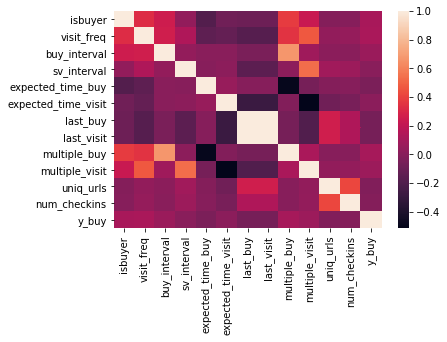

In [14]:
corr_matrix=df.corr()
ax = sns.heatmap(corr_matrix)

- Higher correleted featrures are last_buy and last_visit, the need to be remove from the df becuase both features contain the same information.


In [15]:
df.drop(['last_buy','last_visit'], axis=1, inplace = True)


In [16]:
df.head()

,isbuyer,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
0,0,1,0.0,0.0,0.0,0.0000,0,0,169,2130,0
1,0,1,0.0,0.0,0.0,0.0000,0,0,154,1100,0
3,0,1,0.0,0.0,0.0,0.0000,0,0,150,539,0
4,0,2,0.0,0.5,0.0,-101.1493,0,1,103,362,0
5,0,1,0.0,0.0,0.0,0.0000,0,0,17,35,0


## Replace negative values in uniq_urls feature with the median

In [17]:
df[df['uniq_urls']== -1] # checking for -1 values

,isbuyer,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
23,0,1,0.0,0.000000,0.0,0.000000,0,0,-1,26,0
50,0,2,0.0,0.375000,0.0,-1.345821,0,1,-1,359,0
72,0,1,0.0,0.000000,0.0,0.000000,0,0,-1,99,0
118,0,1,0.0,0.000000,0.0,0.000000,0,0,-1,364,0
158,0,1,0.0,0.000000,0.0,0.000000,0,0,-1,414,0
...,...,...,...,...,...,...,...,...,...,...,...
54327,0,1,0.0,0.000000,0.0,0.000000,0,0,-1,343,0
54409,0,2,0.0,0.041667,0.0,-73.160350,0,1,-1,20,0
54437,0,1,0.0,0.000000,0.0,0.000000,0,0,-1,391,0
54497,0,1,0.0,0.000000,0.0,0.000000,0,0,-1,1297,0


In [18]:
df['uniq_urls'] = df['uniq_urls'].replace(-1, np.nan) # replace
df['uniq_urls'] = df['uniq_urls'].fillna(df['uniq_urls'].median())

<IPython.core.display.Javascript object>

In [19]:
df.describe()

,isbuyer,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
count,54068.000000,54068.000000,54068.000000,54068.000000,54068.000000,54068.000000,54068.000000,54068.000000,54068.000000,54068.000000,54068.000000
mean,0.043038,1.860916,0.212012,5.881207,-0.199930,-10.308233,0.006418,0.280092,88.340349,726.785455,0.004679
std,0.202945,2.934536,3.940633,17.669956,5.021547,32.015802,0.079855,0.449048,60.947754,1279.911461,0.068246
min,0.000000,0.000000,0.000000,0.000000,-181.923800,-187.615600,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,130.000000,0.000000
50%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,78.000000,324.000000,0.000000
75%,0.000000,2.000000,0.000000,0.166667,0.000000,0.000000,0.000000,1.000000,155.000000,809.000000,0.000000
max,1.000000,84.000000,174.625000,184.916700,84.285710,91.401920,1.000000,1.000000,206.000000,37091.000000,1.000000


## Exploratory Data Analysis

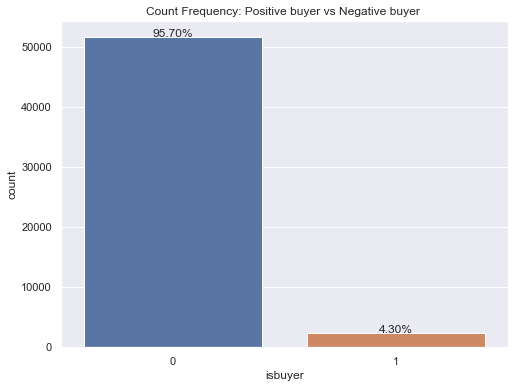

In [20]:
count_freq_plot(df,"isbuyer", "buyer", True)

- The mayority of the users didnt buy the product in the past. They are new buyers.

Text(0.5, 0, 'Avg of visit_freq')

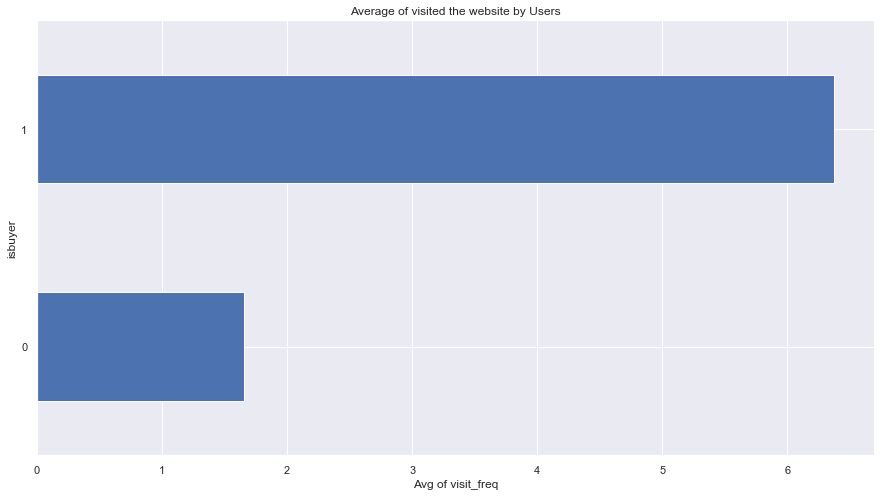

In [21]:
df.groupby(['isbuyer'])['visit_freq'].mean().sort_values().plot(kind='barh', figsize=(15,8))
plt.title('Average of visited the website by Users')
plt.xlabel("Avg of visit_freq")

# the mean num_checkins by isbuyer

# New Buyers havent visit the website in the past.
# buyers that purchaser the product in the past visit the website more often

- Buyers that purchaser the product in the past visit the website more often

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, '# of visit_freq')

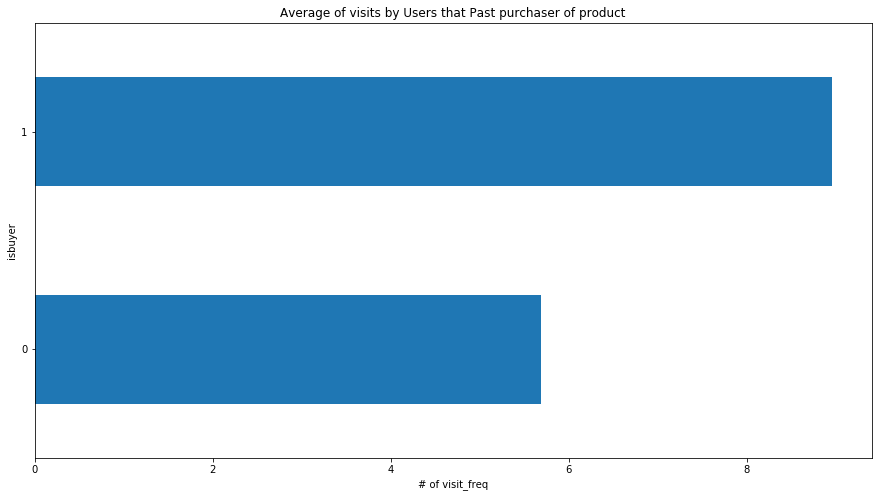

In [14]:
df.groupby(['isbuyer'])['sv_interval'].mean().sort_values().plot(kind='barh', figsize=(15,8))
plt.title('Average of visits by Users that Past purchaser of product')
plt.xlabel("# of visit_freq")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 0, '# of visit_freq')

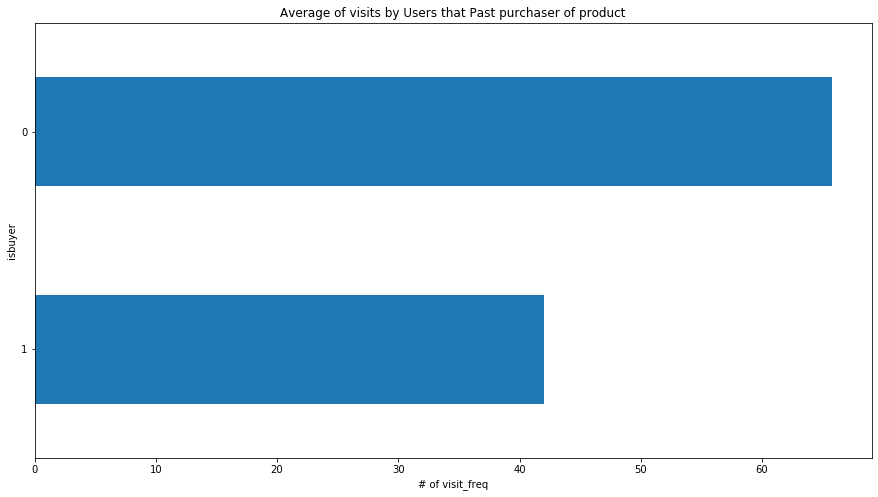

In [17]:
df.groupby(['isbuyer'])['last_buy'].mean().sort_values().plot(kind='barh', figsize=(15,8))
plt.title('Average of visits by Users that Past purchaser of product')
plt.xlabel("# of visit_freq")

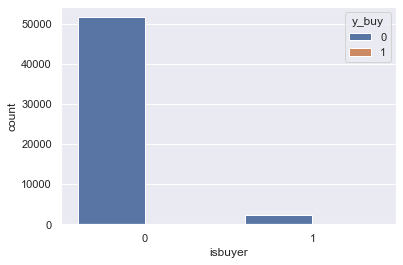

In [22]:
sns.countplot(x = 'isbuyer', hue = 'y_buy', data = df)

In [18]:
df.groupby(['isbuyer'])['last_buy'].mean()

isbuyer
0    65.741317
1    42.003438
Name: last_buy, dtype: float64

## Normalized df

In [23]:
normalizad_features(df)

,isbuyer,visit_freq,buy_interval,sv_interval,expected_time_buy,expected_time_visit,multiple_buy,multiple_visit,uniq_urls,num_checkins,y_buy
0,0.0,0.011905,0.0,0.000000,0.683386,0.672415,0.0,0.0,0.820388,0.057401,0.0
1,0.0,0.011905,0.0,0.000000,0.683386,0.672415,0.0,0.0,0.747573,0.029631,0.0
3,0.0,0.011905,0.0,0.000000,0.683386,0.672415,0.0,0.0,0.728155,0.014505,0.0
4,0.0,0.023810,0.0,0.002704,0.683386,0.309896,0.0,1.0,0.500000,0.009733,0.0
5,0.0,0.011905,0.0,0.000000,0.683386,0.672415,0.0,0.0,0.082524,0.000917,0.0


## Target Feature

- Binary feature: buy the product and not buy the product


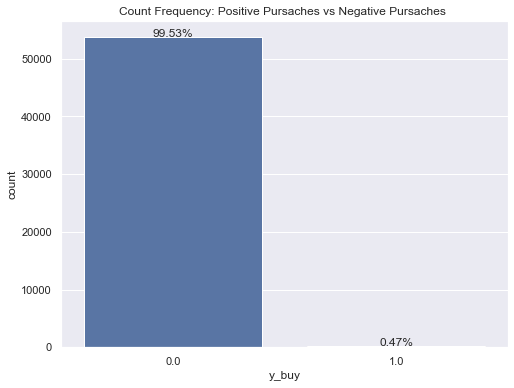

In [24]:
count_freq_plot(df,"y_buy", 'Pursaches', True)

- 99,53% of users didnt buy the product, only 0.47% of users buy the product. The target value is imbalance, it has 
higert % of user that didnt buy the products. 

## Defining x and y


In [25]:
x = df.loc[:,['isbuyer', 'visit_freq', 'buy_interval', 'sv_interval',
       'expected_time_buy', 'expected_time_visit', 'multiple_buy',
       'multiple_visit', 'uniq_urls', 'num_checkins']]
           
           
y = df.loc[:,'y_buy'] # target value

- train, val, test set will be 60%, 20%, 20% of the dataset respectively.

## Oversampling the minority of the classes

In [26]:
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(x, y)
len(X_over)

107630

In [27]:
X_train, X_test, y_train, y_test = train_test_split( X_over , y_over, test_size=0.2, random_state=1)
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

## Smote Algorithm to balance the df

- Solving class imbalace problem (the algorithm generates new sample data by creating 'synthetic' examples that are combinations of the closest minority class cases.)

In [28]:
logreg1 = LogisticRegression()
model_log = logreg1.fit(X_train, y_train)
y_pred_c1 = logreg1.predict(X_test)


In [50]:
cdf = pd.DataFrame(model_log.coef_[0], x.columns, columns=['Coefficients'])


In [52]:
cdf['Coefficients'].sort_values(ascending = False)

expected_time_visit    5.205912
visit_freq             4.902478
multiple_visit         2.175334
isbuyer                1.632379
expected_time_buy      1.521132
multiple_buy           1.063921
num_checkins           0.345787
uniq_urls             -1.329898
buy_interval          -2.317342
sv_interval           -3.619763
Name: Coefficients, dtype: float64

In [55]:
from sklearn.feature_selection import RFE
x.columns

Index(['isbuyer', 'visit_freq', 'buy_interval', 'sv_interval',
       'expected_time_buy', 'expected_time_visit', 'multiple_buy',
       'multiple_visit', 'uniq_urls', 'num_checkins'],
      dtype='object')

In [29]:
precision,recall,fscore,support = metrics.precision_recall_fscore_support(y_test,y_pred_c1, average = 'weighted')
print(' Precision: ', precision, '\n',
      'Recall: ', recall, '\n',
      'fscore: ', fscore, '\n')

 Precision:  0.7883098887044061 
 Recall:  0.7849112700919818 
 fscore:  0.7842530875537467 



In [30]:
def metrix_classifier(x , y):
    """ calculated the accuracy and print out accuracy and classification report"""
    accuracy = round(metrics.accuracy_score(x, y) * 100 ,2)
    print(f"Accuracy: {accuracy} %")
#     f1_score = round(metrics.f1_score(x , y) * 100 , 2)
    print("F1 Score: {}".format(f1_score(x, y)))
    print(classification_report(x,  y)) # maybe remove this

In [31]:

def confusion_m(x,y,classifier):
    """ it plots a confusion matrix """
    cm = confusion_matrix(x, y)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax)
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels') 
    ax.set_title('Confusion Matrix ' + classifier)
    ax.xaxis.set_ticklabels(['Fail', 'Pass']); ax.yaxis.set_ticklabels(['Fail', 'Pass'])
    

Accuracy: 78.49 %
F1 Score: 0.7721680936915659
              precision    recall  f1-score   support

         0.0       0.76      0.84      0.80     10778
         1.0       0.82      0.73      0.77     10748

    accuracy                           0.78     21526
   macro avg       0.79      0.78      0.78     21526
weighted avg       0.79      0.78      0.78     21526



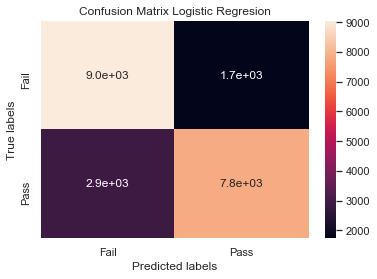

In [32]:

metrix_classifier(y_test, y_pred_c1)
confusion_m(y_test,y_pred_c1, 'Logistic Regresion')

In [26]:
clf = xgb.XGBClassifier(booster= gblinear)
clf.fit(X_train, y_train)
training_preds = clf.predict(X_train)
val_preds = clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

Training Accuracy: 84.76%
Validation accuracy: 84.91%


In [ ]:

param_grid = {
    "learning_rate": [0.1, .5, .75],
    'max_depth': [6, 10, 12],
    'min_child_weight': [5, 7, 9],
    'subsample': [.3, .9],
    'n_estimators': [5, 100],
}


grid_clf = GridSearchCV(clf, param_grid, scoring='accuracy', cv=None, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))



In [ ]:
training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))

In [ ]:
xgb_classification_report = classification_report(y_test, val_preds)
print(xgb_classification_report)

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from imblearn.pipeline import make_pipeline

sklearn.__version__

<IPython.core.display.Javascript object>

'0.22.1'

In [16]:
X_train, X_test, y_train, y_test = train_test_split( x , y, test_size=0.2, random_state=1)


In [17]:
 # Creating an scaler object
std_slc = StandardScaler()
# sm = SMOTE()
    # Creating a pca object
oversample =  RandomOverSampler()
    # Creating a logistic regression object
logistic_Reg = LogisticRegression()
xgclassi = XGBClassifier()

In [22]:
from imblearn.pipeline import Pipeline
model = Pipeline([('std_slc', std_slc),
        ('sampling', oversample),
        ('clf', xgclass )])

# pipe1=make_pipeline(std_slc, oversample,c)



In [23]:
param_grid_1 = {'clf__penalty': ['l1', 'l2'],'clf__C':[0.001,.009,0.01,.09,1,5,10,25]}

param_grid = {
    'clf__learning_rate': [0.1, 0.2],
    'clf__max_depth': [6],
    'clf__min_child_weight': [1, 2],
    'clf__subsample': [0.5, 0.7]
}
grid_clf = GridSearchCV(model, param_grid, scoring='accuracy', cv=3, n_jobs=1)
grid_clf.fit(X_train, y_train)

best_parameters = grid_clf.best_params_

print("Grid Search found the following optimal parameters: ")
for param_name in sorted(best_parameters.keys()):
    print("%s: %r" % (param_name, best_parameters[param_name]))



Grid Search found the following optimal parameters: 
clf__learning_rate: 0.2
clf__max_depth: 6
clf__min_child_weight: 1
clf__subsample: 0.7


In [24]:
training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))


Training Accuracy: 98.09%
Validation accuracy: 97.53%


In [25]:
xgb_classification_report = classification_report(y_test, val_preds)
print(xgb_classification_report)

              precision    recall  f1-score   support

           0       1.00      0.98      0.99     10766
           1       0.02      0.10      0.04        48

    accuracy                           0.98     10814
   macro avg       0.51      0.54      0.51     10814
weighted avg       0.99      0.98      0.98     10814



In [38]:
training_preds = grid_clf.predict(X_train)
val_preds = grid_clf.predict(X_test)
training_accuracy = accuracy_score(y_train, training_preds)
val_accuracy = accuracy_score(y_test, val_preds)

print("")
print("Training Accuracy: {:.4}%".format(training_accuracy * 100))
print("Validation accuracy: {:.4}%".format(val_accuracy * 100))


Training Accuracy: 85.71%
Validation accuracy: 86.16%


In [39]:
xgb_classification_report = classification_report(y_test, val_preds)
print(xgb_classification_report)

              precision    recall  f1-score   support

           0       1.00      0.86      0.93     10766
           1       0.02      0.69      0.04        48

    accuracy                           0.86     10814
   macro avg       0.51      0.77      0.48     10814
weighted avg       0.99      0.86      0.92     10814



In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X_over , y_over, test_size=0.2, random_state=1)


In [1]:
len(y_over)

NameError: name 'y_over' is not defined